In [94]:
quadrante_numbers = [0, 1, 2, 3] # 0 to 3
fish_identification = [1, 2] # 1 to 2
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("C:/Users/marcio/Documents/results_Ian/20191121_1454_iCab_L_C.avi.csv")

df = df.set_index(['frame_number'])

df["take"] = None
#the_second=False

In [95]:
#df = df.loc[(df["fish_id"] != "X") & (df["fish_id"] != "Y")]

import ast
df['fish_head'] = df['fish_head'].apply(ast.literal_eval)
df['fish_tail'] = df['fish_tail'].apply(ast.literal_eval)
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df['tail_points'] = df['tail_points'].apply(ast.literal_eval)
df['quad_coord'] = df['quad_coord'].apply(ast.literal_eval)

In [96]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
2469,22.135944,"(339, 576)","(358, 619)","(332, 555)",0,597.5,1,"[(566, 336), (579, 341), (592, 344), (605, 348...","(0, 430, 414, 440)",None
2469,14.142136,"(214, 396)","(236, 372)","(204, 406)",3,269.5,1,"[(400, 211), (393, 217), (385, 223), (377, 229...","(0, 0, 416, 409)",None
2469,16.155494,"(130, 250)","(96, 262)","(145, 244)",3,349.0,2,"[(248, 136), (252, 126), (255, 116), (257, 106...","(0, 0, 416, 409)",None


In [98]:


df.groupby(["quadrant", "fish_id"])["tail_points"].count()

quadrant  fish_id
0         1          1182
          2          1182
          X            87
          Y            87
1         1          1209
          2          1209
          X            60
          Y            60
2         1           647
          2           647
          X           603
          Y           603
3         1          1004
          2          1004
          X           214
          Y           214
Name: tail_points, dtype: int64

In [52]:
set_number = 1
for quadrant in quadrante_numbers:    
    for fish_ident in fish_identification:        
        list_frames = list(df[(df["quadrant"] == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")) ].index.unique())
        for idx, value in enumerate(list_frames):
            if idx > 0:
                the_value = df.loc[(df.index==value) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                previous_value = df.loc[(df.index==list_frames[idx-1]) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                if the_value.isnumeric() and previous_value.isnumeric():
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                    
                elif not the_value.isnumeric() and (previous_value.isnumeric()):
                    set_number+=1
                            
                elif the_value.isnumeric() and not (previous_value.isnumeric()):
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                

In [53]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
2469,22.135944,"(339, 576)","(358, 619)","(332, 555)",0,597.5,1,"[(566, 336), (579, 341), (592, 344), (605, 348...","(0, 430, 414, 440)",1
2469,14.142136,"(214, 396)","(236, 372)","(204, 406)",3,269.5,1,"[(400, 211), (393, 217), (385, 223), (377, 229...","(0, 0, 416, 409)",4
2469,16.155494,"(130, 250)","(96, 262)","(145, 244)",3,349.0,2,"[(248, 136), (252, 126), (255, 116), (257, 106...","(0, 0, 416, 409)",5


In [54]:
df_filtered = df[(df['take'].notnull())]
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df_filtered['fish_id'] = df_filtered['fish_id'].apply(lambda x: int(x)) 



In [55]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1
...,...,...,...,...,...,...,...,...,...,...
2469,22.135944,"(339, 576)","(358, 619)","(332, 555)",0,597.5,1,"[(566, 336), (579, 341), (592, 344), (605, 348...","(0, 430, 414, 440)",1
2469,14.142136,"(214, 396)","(236, 372)","(204, 406)",3,269.5,1,"[(400, 211), (393, 217), (385, 223), (377, 229...","(0, 0, 416, 409)",4
2469,16.155494,"(130, 250)","(96, 262)","(145, 244)",3,349.0,2,"[(248, 136), (252, 126), (255, 116), (257, 106...","(0, 0, 416, 409)",5


In [56]:
df_filtered["angle"] = np.NAN


In [57]:
df_filtered["angle"] = df_filtered.apply(lambda x: (x.fish_head, x.tail_points[1]), axis=1)


In [58]:
df_filtered.groupby(["quadrant", "fish_id"])["tail_points"].count()

quadrant  fish_id
0         1          1182
          2          1182
1         1          1209
          2          1209
2         1           647
          2           647
3         1          1004
          2          1004
Name: tail_points, dtype: int64

In [59]:
df_filtered["rotation"] = np.NAN

In [60]:
import math

def calc_rotation(angle):
    x = angle[0][0] - angle[1][1]   #must invert, as squeleton points is y,x
    
    y = angle[0][1] - angle[1][0]   #must invert, as squeleton points is y,x
   
    dual_degree = math.atan2(y*-1, x) * 180 / np.pi
    
                  
      
    

    return dual_degree


df_filtered["rotation"] = df_filtered["angle"].apply(calc_rotation)


In [61]:
df_filtered['abs_rotation'] = abs(df_filtered['rotation'])
df_filtered
#df_filtered['Btime'].iloc[0]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation
frame_number,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,22.135944,"(339, 576)","(358, 619)","(332, 555)",0,597.5,1,"[(566, 336), (579, 341), (592, 344), (605, 348...","(0, 430, 414, 440)",1,"((332, 555), (579, 341))",110.556045,110.556045
2469,14.142136,"(214, 396)","(236, 372)","(204, 406)",3,269.5,1,"[(400, 211), (393, 217), (385, 223), (377, 229...","(0, 0, 416, 409)",4,"((204, 406), (393, 217))",-135.000000,135.000000
2469,16.155494,"(130, 250)","(96, 262)","(145, 244)",3,349.0,2,"[(248, 136), (252, 126), (255, 116), (257, 106...","(0, 0, 416, 409)",5,"((145, 244), (252, 126))",22.833654,22.833654


In [62]:
df_filtered['diff'] = df_filtered.groupby(["quadrant", "fish_id", "take"])['abs_rotation'].diff() #abs(df_filtered['abs_rotation'] - df_filtered['abs_rotation'].shift(1))



In [63]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff
frame_number,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326


<AxesSubplot:>

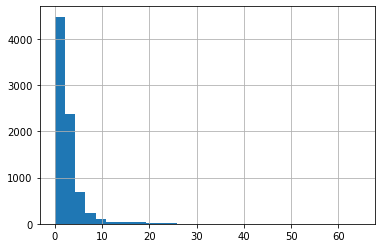

In [64]:
df_filtered["diff"].abs().hist(bins = 30)

In [65]:
df_filtered["displace"] = np.NAN

for quadrant in quadrante_numbers:
    print(quadrant)
    for fish_ident in fish_identification:
        print(fish_ident)
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        print(the_takes)
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 1:
                    
                               
                    the_value = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]
                    previous_value = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]           
                                        
                    df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'displace'] = ((the_value[0] - previous_value[0])**2 \
                    + (the_value[1] - previous_value[1])**2)**0.5
                            
                    
      
        
       
                


    


    



0
1
[1]
2
[1]
1
1
[1]
2
[1]
2
1
[1 2]
2
[2 3]
3
1
[3 4]
2
[4 5]


In [66]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010,3.162278
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010,3.162278
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278


Calculate the predicted next position if fish would be swimming straight

<AxesSubplot:>

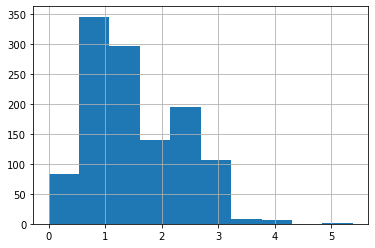

In [67]:
df_filtered.loc[(df_filtered["quadrant"]==0) & (df_filtered["fish_id"]==2)]["displace"].hist()

<AxesSubplot:>

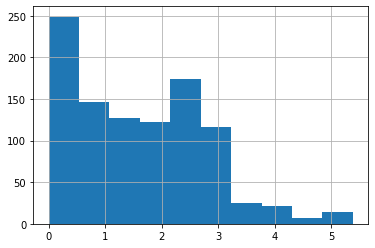

In [68]:
df_filtered.loc[(df_filtered["quadrant"]==3) & (df_filtered["fish_id"]==2)]["displace"].hist()


In [69]:
df_filtered["next_predicted"] = None
from sklearn.linear_model import LinearRegression

def reg(row):
    coord=row["angle"]
    distance = row["displace"]
    #print(type(distance))
    #print(coord)
    #print(distance)
    
    if not np.isnan(distance):
        print("calculate")
        x = np.array([coord[1][1], coord[0][0]]).reshape((-1, 1)) # need to invert as tail is y and x and  not xy
        y = np.array([coord[1][0], coord[0][1]])
        model_regression = LinearRegression()
        model_regression.fit(x, y)
        model_regression = LinearRegression().fit(x, y)
        
        #calculate the next x based on distance of body and head
        calc = coord[1][1] - coord[0][0]
        if calc > 0:
            calc_x = coord[0][0] - distance
        else:
            calc_x = coord[0][0] + distance
            
        
        x = np.array([calc_x]).reshape((-1, 1))
        y_pred = model_regression.predict(x)
        return (int(calc_x), int(y_pred[0]))
    else:
        return None

df_filtered["next_predicted"] = df_filtered.apply(reg, axis = 1)

calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate


In [70]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted
frame_number,,,,,,,,,,,,,,,,
1261,14.142136,"(585, 582)","(565, 556)","(595, 592)",1,324.5,1,"[(588, 590), (581, 584), (573, 578), (565, 571...","(440, 426, 408, 444)",1,"((595, 592), (581, 584))",-45.000000,45.000000,NaN,NaN,None
1261,17.720045,"(637, 466)","(602, 455)","(654, 471)",1,350.0,2,"[(470, 651), (467, 639), (463, 627), (460, 615...","(440, 426, 408, 444)",1,"((654, 471), (467, 639))",-14.931417,14.931417,NaN,NaN,None
1262,14.212670,"(586, 583)","(565, 556)","(595, 594)",1,330.5,1,"[(588, 591), (581, 584), (573, 579), (565, 571...","(440, 426, 408, 444)",1,"((595, 594), (581, 584))",-49.763642,49.763642,4.763642,2.000000,"(597, 596)"
1262,17.720045,"(640, 467)","(604, 455)","(657, 472)",1,343.5,2,"[(470, 652), (466, 640), (463, 628), (460, 616...","(440, 426, 408, 444)",1,"((657, 472), (466, 640))",-19.440035,19.440035,4.508618,3.162278,"(660, 473)"
1263,14.212670,"(587, 584)","(568, 557)","(596, 595)",1,326.5,1,"[(589, 592), (581, 585), (573, 579), (565, 573...","(440, 426, 408, 444)",1,"((596, 595), (581, 585))",-51.842773,51.842773,2.079132,1.414214,"(597, 596)"
1263,17.720045,"(643, 468)","(607, 458)","(660, 473)",1,352.0,2,"[(472, 656), (468, 644), (464, 632), (461, 620...","(440, 426, 408, 444)",1,"((660, 473), (468, 644))",-17.354025,17.354025,-2.086010,3.162278,"(663, 473)"
1264,14.422205,"(589, 584)","(569, 558)","(597, 596)",1,328.0,1,"[(590, 594), (582, 586), (574, 580), (566, 573...","(440, 426, 408, 444)",1,"((597, 596), (582, 586))",-51.842773,51.842773,0.000000,1.414214,"(598, 597)"
1264,18.027756,"(646, 468)","(610, 457)","(663, 474)",1,348.5,2,"[(472, 658), (468, 646), (465, 634), (461, 622...","(440, 426, 408, 444)",1,"((663, 474), (468, 646))",-19.440035,19.440035,2.086010,3.162278,"(666, 475)"
1265,13.453624,"(590, 586)","(570, 563)","(600, 595)",1,321.0,1,"[(590, 595), (584, 588), (577, 582), (571, 576...","(440, 426, 408, 444)",1,"((600, 595), (584, 588))",-42.510447,42.510447,-9.332326,3.162278,"(603, 597)"


In [71]:
df_filtered['diff_pred'] = np.NaN

for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:                   
                    print("will apply")                                                      
                    current_position = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'angle'].iloc[0][0]
                    predicted_position = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'next_predicted'].iloc[0]           
                    if isinstance(predicted_position, tuple):
                        distance = ((current_position[0] - predicted_position[0])**2 + (current_position[1] - predicted_position[1])**2)**0.5
                        df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'diff_pred'] = distance
                                
                    
      
       

        
        




will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply

In [72]:
df_filtered['sequence'] = None
sequence_number = 1
for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            #sequence_number = 1

            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                
                the_fish = df_filtered[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)]
                
                #print(the_fish)
               
                
                if  (the_fish['diff_pred'].iloc[0] < 3) and (the_fish['diff'].iloc[0] < 2)  and (the_fish['displace'].iloc[0] < 6.5):
                   #(the_fish['diff_pred'].iloc[0] < 50) and
                    df_filtered.loc[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id), 'sequence'] = sequence_number 
                    #df_filtered.loc[df_filtered.index[idx], 'sequence'] = sequence_number
                else:
                   
                    sequence_number = sequence_number + 1









In [75]:
df_filtered.loc[(df_filtered["quadrant"]==3) & (df_filtered["fish_id"]==1)]["sequence"].count()


588

<AxesSubplot:>

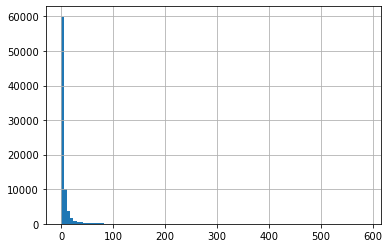

In [25]:
df_filtered["diff_pred"].hist(bins=100)

In [76]:
count_df = df_filtered.groupby('sequence')['sequence'].count()


In [77]:
filtered_count = count_df[count_df > 5]

In [79]:
#filtered_count.loc[(filtered_count["quadrant"]==3) & (filtered_count["fish_id"]==1)]["sequence"].count()
filtered_count


sequence
5        7
6        6
8       11
9       12
10      14
61       6
74       6
77       8
80      17
177      6
180      7
181      9
183      8
188      8
194      6
197     14
200     25
201     10
202      9
224      6
228     17
229      7
230      6
232      8
233     12
235     14
236     10
251     22
257     10
261      8
262     11
381      8
389      6
397     19
410      7
426      9
485     14
500      6
501      9
502     10
506     27
513      6
514     11
526     18
527      9
528      8
595      8
597      8
605     13
606     10
617      9
619     11
624      6
657      7
658      6
659      6
667      9
671     10
715      8
717      6
878     13
882     10
890     25
899     13
900      6
902      6
905     21
943     10
944      6
945     10
946     19
978      8
981     17
986      7
988      6
989     14
990      8
1132    10
1134     9
1144     6
1149     6
1150     8
1241     9
1245     8
1246     9
1249    21
1251    15
1310     7
1345     6
1351    11
1

In [80]:
filtered_count = filtered_count.index.tolist()

In [81]:
filtered_count = set(filtered_count)

In [82]:
final_df = df_filtered[df_filtered['sequence'].isin(filtered_count)]


In [93]:
final_df.groupby(["quadrant", "fish_id"]).count()


length_of_fish  center_of_mass  fish_tail  fish_head  \
quadrant fish_id                                                         
0        1                   369             369        369        369   
         2                   374             374        374        374   
1        1                   290             290        290        290   
         2                   193             193        193        193   
2        1                    63              63         63         63   
         2                   102             102        102        102   
3        1                   249             249        249        249   
         2                   168             168        168        168   

                  fish_area  tail_points  quad_coord  take  angle  rotation  \
quadrant fish_id                                                              
0        1              369          369         369   369    369       369   
         2              374          374         374   374    374       374   
1        1              290          290         290   290    290       290   
         2              193          193         193   193    193       193   
2        1               63           63          63    63     63        63   
         2              102          102         102   102    102       102   
3        1              249          249         249   249    249       249   
         2              168          168         168   168    168       168   

                  abs_rotation  diff  displace  next_predicted  diff_pred  \
quadrant fish_id                                                            
0        1                 369   369       369             369        369   
         2                 374   374       374             374        374   
1        1                 290   290       290             290        290   
         2                 193   193       193             193        193   
2        1                  63    63        63              63         63   
         2                 102   102       102             102        102   
3        1                 249   249       249             249        249   
         2                 168   168       168             168        168   

                  sequence  
quadrant fish_id            
0        1             369  
         2             374  
1        1             290  
         2             193  
2        1              63  
         2             102  
3        1             249  
         2             168

<AxesSubplot:>

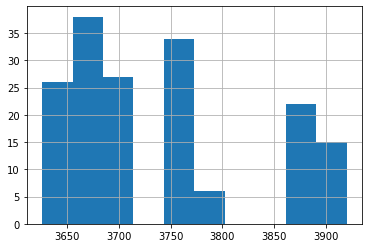

In [87]:
#final_df.loc[(final_df["quadrant"]==3) & (final_df["fish_id"]==2)]["sequence"].hist()


In [31]:
final_df["coord_plus_seq"] = np.NaN
final_df["coord_plus_seq"] = final_df.apply(lambda x: x.fish_head + (int(x.sequence),) + ((x.tail_points),), axis = 1)


In [32]:
final_df = final_df[['length_of_fish', 'center_of_mass', 'fish_tail',
       'fish_head', 'quadrant', 'fish_area', 'fish_id', 'tail_points', 
       'quad_coord', 'sequence', "take"]]



In [33]:
final_df.to_csv('C:/Users/marcio/Documents/fish_analyzer_rotated' + '.csv', mode='w', index=True, header=True)


In [34]:
pd.set_option('display.max_rows', 1000000)

final_df.loc[final_df["quadrant"] == 1].head(100)


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,sequence,take
frame_number,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"[(481, 690), (477, 679), (473, 668), (468, 657...","(440, 426, 408, 444)",21322,69
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"[(483, 696), (479, 684), (474, 672), (470, 660...","(440, 426, 408, 444)",21322,69
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"[(483, 696), (479, 684), (475, 672), (471, 660...","(440, 426, 408, 444)",21322,69
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"[(483, 696), (479, 685), (476, 674), (472, 663...","(440, 426, 408, 444)",21322,69
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"[(484, 698), (480, 687), (476, 676), (473, 665...","(440, 426, 408, 444)",21322,69
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"[(484, 700), (481, 689), (477, 678), (472, 667...","(440, 426, 408, 444)",21322,69
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"[(494, 717), (489, 707), (483, 697), (476, 687...","(440, 426, 408, 444)",21325,69
1289,18.867962,"(712, 491)","(677, 471)","(728, 501)",1,361.5,2,"[(496, 721), (490, 710), (483, 699), (477, 688...","(440, 426, 408, 444)",21325,69
1290,15.811388,"(718, 495)","(685, 477)","(731, 504)",1,355.5,2,"[(500, 725), (493, 715), (485, 705), (479, 695...","(440, 426, 408, 444)",21325,69
